# 02. Rendering with PyPowsyBl

This notebook rouglhy shows how to use the PyPowsyBl library to render a network diagram.
To train ourselves, we will use the following pre-built networks :

- a basic **4 substations** network
- `ieee300` : a **300 bus** network
- `ieee118` : a **118 bus** network

> ::Note:: Generally speaking, the PyPowsyBl library is quite well documented. You can find the full documentation [here](https://powsybl.readthedocs.io/projects/pypowsybl/en/stable/user_guide/index.html)


### Diagrams types

There are several types of diagrams that can be rendered with PyPowsyBl. Here are some of them :

- `SingleLineDiagram` or `SLD` : a simple diagram with all the elements of the network. This is the most common type of diagram in which all the generators, transformers, lines, etc. are displayed.

- `NetworkAreaDiagram` or `NAD` : a diagram that shows the network as a whole. t is a type of diagram that provides a high-level view of the network, showing the connections between different areas or regions. This type of diagram is useful for understanding the overall structure and connectivity of the network.



## Importing the libraries 


In [1]:
import pypowsybl as pp 
import pypowsybl.loadflow as lf
import numpy as np
import pandas as pd

___
## Single Line Diagram (SLD)

To work on the single line diagram, we will use a very simple network composed of only 4 substations. 


### Let's import the network

Once the network is imported, we can see that among the **4 substations**, there **5** voltages levels which are either fixed to **400 kV** or **225 kV**.

- On `S1` we have two differents voltage levels : **400 kV** and **225 kV**
- On `S2`, `S3` and `S4` we have only one voltage level (all are fixed to **400 kV**)

In [2]:
network = pp.network.create_four_substations_node_breaker_network()
network.get_voltage_levels()

,name,substation_id,nominal_v,high_voltage_limit,low_voltage_limit
id,,,,,
S1VL1,,S1,225.0,240.0,220.0
S1VL2,,S1,400.0,440.0,390.0
S2VL1,,S2,400.0,440.0,390.0
S3VL1,,S3,400.0,440.0,390.0
S4VL1,,S4,400.0,440.0,390.0


In [3]:
network.update_switches(id="S1VL2_COUPLER",open=True)
res = lf.run_ac(network)[0]

### Parameters for rendering


#### `SldParameters`

- `use_name` = true: *if true, the name of the equipment is displayed. If false, the id is displayed (default value true)*
- `center_name` = false: *if true, the name is centered on the equipment. If false, the name is displayed on the right of the equipment (default value false)*
- `diagonal_label` = false: *if true, the label is displayed diagonally. If false, the label is displayed horizontally (default value false)*
- `nodes_infos` = true: *if true, information about nodes is displayed (default value true)*
- `tooltip_enabled` = true: *if true, tooltips are enabled (default value true)*
- `topological_coloring` = true: *if true, topological coloring is enabled (default value true)*
- `display_current_feeder_info` = true: *if true, current feeder information is displayed (default value true)*
- `active_power_unit` = "MW": *unit for active power (default value "MW")*
- `reactive_power_unit` = "MVAR": *unit for reactive power (default value "MVAR")*
- `current_unit` = "A": *unit for current (default value "A")*
- `component_library` = 'convergence': *library used for components (default value 'convergence')*

In [4]:
param = pp.network.SldParameters(use_name = True,
                                center_name = False, 
                                diagonal_label = False, 
                                nodes_infos = True, 
                                tooltip_enabled = True, 
                                topological_coloring = True,
                                display_current_feeder_info = True,
                                active_power_unit = "MW",
                                reactive_power_unit = "MVAR",
                                current_unit = "A",
                                component_library = 'convergence',
                                )


### 1. Rendering only one Voltage Level in a specific substation

With the `get_single_line_diagram` method, we can render only one voltage level in a substation. This is useful when we have a huge network and we want to focus on a specific voltage level. 

<br>
<details>
<summary><code>get_single_line_diagram</code> method</summary>

```python
def get_single_line_diagram(self, container_id: str, parameters: SldParameters = None) -> Svg:
        """
        Create a single line diagram from a voltage level or a substation.

        Args:
            container_id: a voltage level id or a substation id
            parameters: single-line diagram parameters to adjust the rendering of the diagram

        Returns:
            the single line diagram
        """

        p = parameters._to_c_parameters() if parameters is not None else _pp.SldParameters()  # pylint: disable=protected-access

        svg_and_metadata: List[str] = _pp.get_single_line_diagram_svg_and_metadata(self._handle, container_id, p)
        return Svg(svg_and_metadata[0], svg_and_metadata[1])
```

</details>



In [5]:
network.get_single_line_diagram('S3VL1',parameters = param)

### 2. Rendering several substation in the same diagram

While `get_single_line_diagram` method is used to render only one voltage level in a substation, the `get_matrix_multi_substations_single_line_diagram` method is used to render several substations in the same diagram.

<br>
<details>
<summary><code>get_matrix_multi_substations_single_line_diagram</code> method</summary>

```python

def get_matrix_multi_substation_single_line_diagram(self, matrix_ids: List[List[str]], parameters: SldParameters = None) -> Svg:
        """
        Create a single line diagram from multiple substations

        Args:
            matrix_ids: a two-dimensional list of substation id
            parameters:single-line diagram parameters to adjust the rendering of the diagram

        Returns:
            the single line diagram
        """

        p = parameters._to_c_parameters() if parameters is not None else _pp.SldParameters()  # pylint: disable=protected-access

        svg_and_metadata: List[str] = _pp.get_matrix_multi_substation_single_line_diagram_svg_and_metadata(self._handle, matrix_ids, p)
        return Svg(svg_and_metadata[0], svg_and_metadata[1])

```

</details>

In [8]:
network.get_matrix_multi_substation_single_line_diagram([['S1', 'S2'],['S3','S4']],parameters = param)

____
## Network Area Diagram (NAD)

### Parameters for rendering

#### `NadParameters`

- `edge_name_displayed`= false : *if true, names along lines and transformer legs are displayed*
- `id_displayed`= false : *if true, the equipment ids are displayed. If false, the equipment names are displayed (if a name is null, then the id is displayed)*
- `edge_info_along_edge`= true : *if true, the edge information (P or Q values for example) is displayed alongside the edge. If false, the edge information is displayed perpendicularly to the edge* 
- `power_value_precision` = 0 : *number of digits after the decimal point for power values*
- `angle_value_precision` = 1 : *number of digits after the decimal point for angle values*
- `current_value_precision`= 0 : *number of digits after the decimal point for current values*
- `voltage_value_precision` = 1 : *number of digits after the decimal point for voltage values*
- `bus_legend`= true : *if true, angle and voltage values associated to a voltage level are displayed in a text box. If false, only the voltage level name is displayed*
- `substation_description_displayed`= false : *if true, the substation name is added to the voltage level info on the diagram*
- `edge_info_displayed`= EdgeInfoType.ACTIVE_POWER(default) : *type of info displayed (EdgeInfoType.ACTIVE_POWER(default),EdgeInfoType.REACTIVE_POWER or EdgeInfoType.CURRENT)*

In [20]:
params = pp.network.NadParameters(
        edge_name_displayed = True,
        id_displayed = False,
        edge_info_along_edge = True,
        power_value_precision = 0,
        angle_value_precision = 1,
        current_value_precision = 0,
        voltage_value_precision = 1,
        bus_legend = True,
        substation_description_displayed = False,
        edge_info_displayed = pp.network.EdgeInfoType.CURRENT,
)

### 1. Rendering a Network Area Diagram filtering on a range of voltage levels

With the `get_network_area_diagram` method, we can render a network area diagram filtering on a range of voltage levels. This is useful when we have a huge network and we want to focus on a specific range of voltage levels.

<br>
<details>
<summary><code>get_network_area_diagram</code> method</summary>

```python

def get_network_area_diagram(self, voltage_level_ids: Union[str, List[str]] = None, depth: int = 0,
                                 high_nominal_voltage_bound: float = -1, low_nominal_voltage_bound: float = -1,
                                 nad_parameters: NadParameters = None) -> Svg:
        """
        Create a network area diagram.

        Args:
            voltage_level_ids: the voltage level IDs, centers of the diagram (None for the full diagram)
            depth: the diagram depth around the voltage level
            high_nominal_voltage_bound: high bound to filter voltage level according to nominal voltage
            low_nominal_voltage_bound: low bound to filter voltage level according to nominal voltage
            nad_parameters: parameters for network area diagram

        Returns:
            the network area diagram
        """
        if voltage_level_ids is None:
            voltage_level_ids = []
        if isinstance(voltage_level_ids, str):
            voltage_level_ids = [voltage_level_ids]
        nad_p = nad_parameters._to_c_parameters() if nad_parameters is not None else _pp.NadParameters() # pylint: disable=protected-access
        svg_and_metadata: List[str] = _pp.get_network_area_diagram_svg_and_metadata(self._handle, voltage_level_ids, depth,
                                                    high_nominal_voltage_bound, low_nominal_voltage_bound,
                                                    nad_p)
        return Svg(svg_and_metadata[0], svg_and_metadata[1])

```

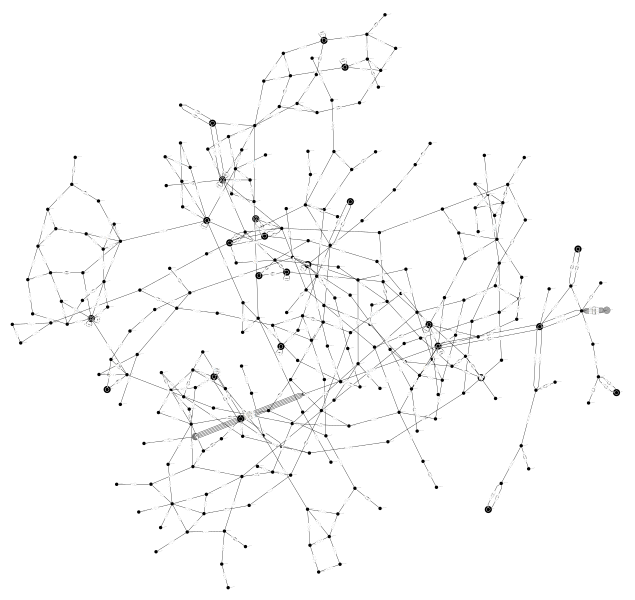

In [ ]:
network = pp.network.create_ieee118()
network.get_network_area_diagram(nad_parameters=params)